In [1]:
# 라이브러리 로딩
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# -----------------------------(bmi, outcome 때서 bmi 예측)
# 1) 데이터 준비(당뇨병 데이터)
# -----------------------------

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/기계학습프로그래밍/3주/diabetes.csv").dropna()

print(df)

# BMI, outcome 땜
X = df.drop(columns=["BMI", "Outcome"])
y = df['BMI']

print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [3]:
# -----------------------------
# 2) 모델 구성
# -----------------------------

model = DecisionTreeRegressor()

In [4]:
# -----------------------------
# 3) 모델 학습
# -----------------------------

model.fit(X_train, y_train)

DecisionTreeRegressor()

In [5]:
# -----------------------------
# 4) 모델 평가
# -----------------------------

y_pred = model.predict(X_test)

# 편차(작을수록 예측 잘됨)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)

MSE: 104.00642857142856
R²: -0.4631184878248753


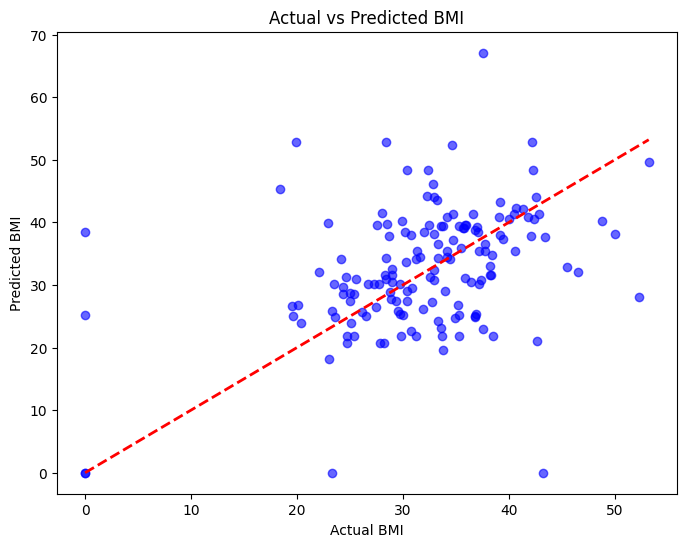

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual BMI")
plt.ylabel("Predicted BMI")
plt.title("Actual vs Predicted BMI")
plt.show()